In [1]:
"""
(1) 怀孕次数;
(2) 口服葡萄糖耐量试验中的 2 小时血浆葡萄糖浓度;
(3) 舒张压(mmHg);
(4) 三头肌皮褶厚度(mm);
(5) 2 小时血清胰岛素浓度(μU/ml);
(6) 体重指数[BMI，即体重(kg)除以身高(m)的平方]; (7) 糖尿病家族函数;
(8) 年龄(岁);
(9) 类变量(0 或 1，代表无或有糖尿病)。
"""
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('MacOSX')
%matplotlib inline

/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
##EDA 探索性数据分析
import seaborn as sns

plt.style.use('fivethirtyeight')

In [4]:
pima = pd.read_csv('data/pima.data')

pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
pima = pd.read_csv('data/pima.data', names=['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes'])

pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima.onset_diabetes.value_counts(normalize=True)

0    500
1    268
Name: onset_diabetes, dtype: int64

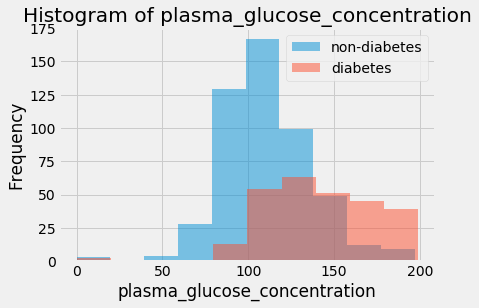

In [9]:
##对 plasma_glucose_concentration 口服葡萄糖耐量试验中的 2 小时血浆葡萄糖浓度;绘制直方图
col = 'plasma_glucose_concentration'
plt.hist(pima[pima.onset_diabetes == 0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima.onset_diabetes == 1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

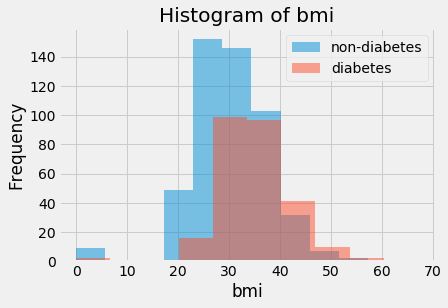

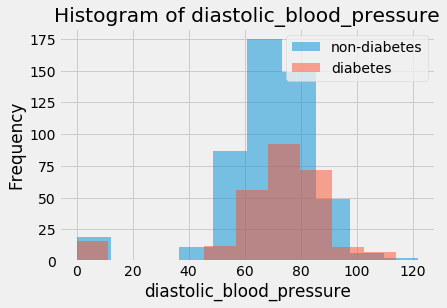

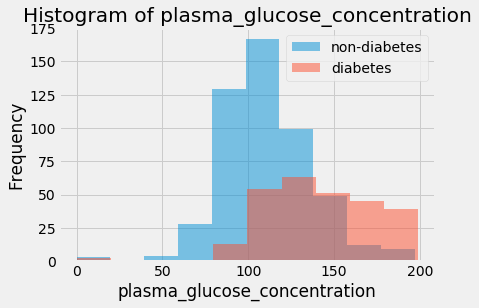

In [11]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5,
    label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

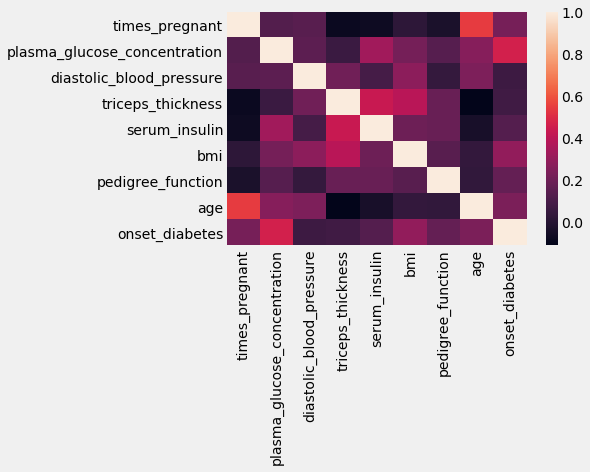

In [12]:
# 数据集相关性矩阵的热力图
sns.heatmap(pima.corr())

In [13]:
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

In [14]:
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [15]:
pima.isna().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [16]:
pima.shape

(768, 9)

In [18]:
pima[pima.onset_diabetes == 0].describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [19]:
pima['serum_insulin'] = pima.serum_insulin.map(lambda x: np.nan if x == 0 else x)

In [20]:
pima.serum_insulin.isnull().sum()

374

In [21]:
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']
for col in columns:
    pima[col].replace([0], [None], inplace=True)

In [22]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [23]:
pima_dropped = pima.dropna()

In [27]:
import math
num_rows_lost = round(100 * (pima.shape[0] - pima_dropped.shape[0]) / float(pima.shape[0]), 2)
print('缺失率：{}'.format(num_rows_lost))

缺失率：48.96


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# 删除响应变量，建立特征矩阵
print('learning from {} rows'.format(X_dropped.shape[0]))
y_dropped = pima_dropped.onset_diabetes

#网格搜索所需的变量和实例

#实验的KNN模型参数

knn_params = {'n_neighbors': [1,3,5,7]}

knn = KNeighborsClassifier() # 设置KNN模型

grid = GridSearchCV(knn, knn_params)

grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)

learning from 392 rows
0.7348263550795197 {'n_neighbors': 7}


In [29]:
pima.plasma_glucose_concentration.fillna(pima.plasma_glucose_concentration.mean(), inplace=True)

In [31]:
pima.plasma_glucose_concentration.isnull().sum()

0

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)

In [35]:
pima_imputed

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [36]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns.values)

In [37]:
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [38]:
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print('learning from {} rows'.format(X_zero.shape[0]))
y_zero = pima_zero.onset_diabetes

grid.fit(X_zero, y_zero)
print(grid.best_score_, grid.best_params_ )

learning from 768 rows
0.7409387997623291 {'n_neighbors': 7}


In [40]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima[['onset_diabetes']].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [41]:
##恰当的做法：在划分后填充值
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima[['onset_diabetes']].copy()

# 使用相同的随机状态，保证划分不变
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [42]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.6822916666666666


In [45]:
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors': [1,2,3,4,5,6,7,8, 9, 10]}

mean_inpute = Pipeline([('imputer', SimpleImputer()), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima.onset_diabetes

grid = GridSearchCV(mean_inpute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

mean_impute = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])

0.7487734487734488 {'classify__n_neighbors': 8}


In [46]:
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors': [1,2,3,4,5,6,7,8, 9, 10]}

mean_inpute = Pipeline([('imputer', SimpleImputer(strategy='median')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima.onset_diabetes

grid = GridSearchCV(mean_inpute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

mean_impute = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])

0.7474917239623121 {'classify__n_neighbors': 8}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2de6e710>,
      dtype=object)

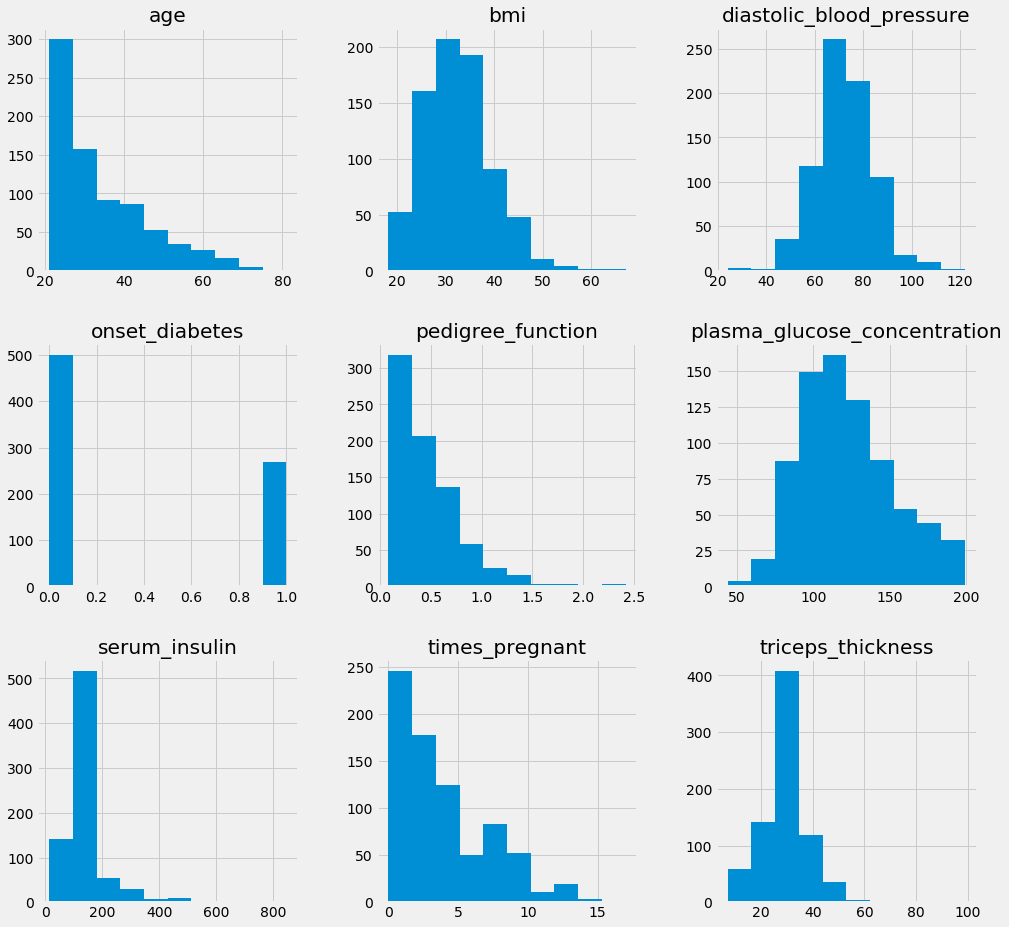

In [47]:
pima_imputed_mean = pd.DataFrame(imputer.fit_transform(pima), columns=pima.columns.values)

pima_imputed_mean.hist(figsize=(15,15))

In [50]:
##将数据归一化标准化

from sklearn.preprocessing import StandardScaler

pima.plasma_glucose_concentration.mean(), pima.plasma_glucose_concentration.std()

(121.68676277850587, 30.43594886720766)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

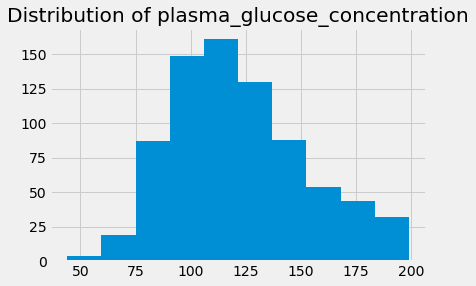

In [51]:
ax = pima.plasma_glucose_concentration.hist()

ax.set_title('Distribution of plasma_glucose_concentration')

In [52]:
##z分标准化
scaler = StandardScaler()
glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])

In [54]:
type(glucose_z_score_standardized)

numpy.ndarray

In [55]:
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

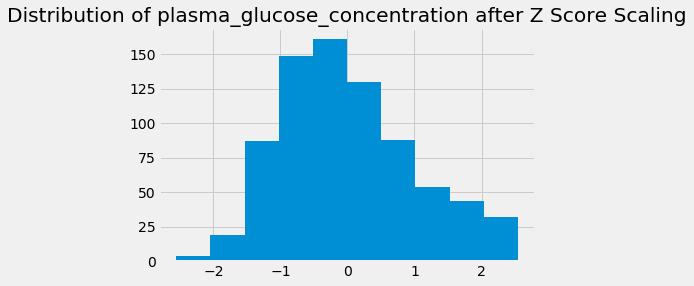

In [56]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c144150>,
      dtype=object)

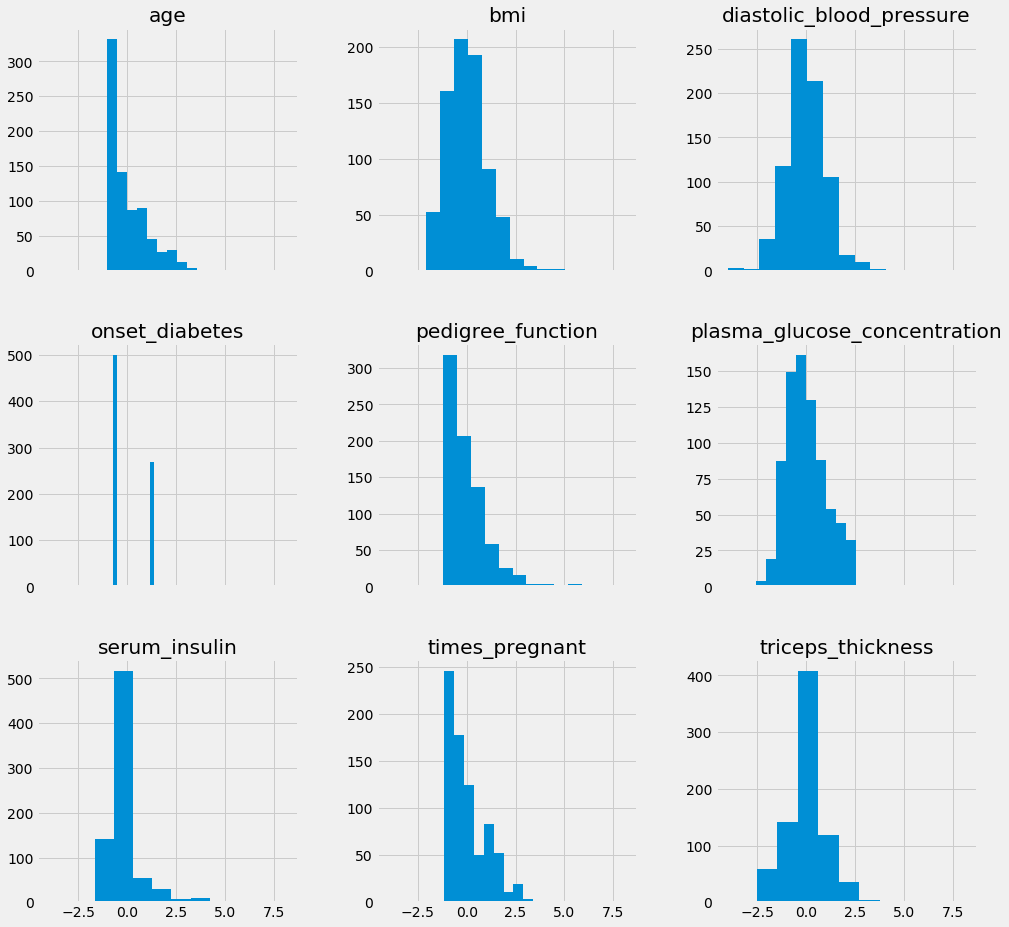

In [59]:
pima_imputed_mean_scaled = pd.DataFrame(scaler.fit_transform(pima_imputed_mean), columns=pima.columns.values)
pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [63]:
knn_params = {'imputer__strategy':['mean', 'median', 'mode'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_imputer_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', StandardScaler()), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima.onset_diabetes

grid = GridSearchCV(mean_imputer_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


In [64]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima.columns.values)

pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
knn_params = {'imputer__strategy': ['mean', 'median', 'mode'], 'classify__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13]}

mean_imputer_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima.onset_diabetes

grid = GridSearchCV(mean_imputer_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)


0.7708853238265003 {'classify__n_neighbors': 11, 'imputer__strategy': 'median'}
